In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply
from sklearn.impute import KNNImputer



In [2]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = './data/stroke.csv'

# The data is read and saved in a variable (stroke)
stroke = pd.read_csv(data)

stroke = pd.DataFrame(stroke)


stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# get and print info on the stroke dataframe
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# checking for all the unique values under the work_type variable/column
stroke["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [5]:
# data standardization - chnaging the uppercase 'R' to lowercase 'r' 
stroke = stroke.rename(columns={"Residence_type": "residence_type"})


In [6]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke_copy = stroke.copy() # Creating a copy of the stroke dataset for experimentation
stroke_dropna = stroke.copy() # dataset copy to be used for dropna() action
stroke_fillna = stroke.copy() # Dataset copy to be used for data imputing using forward/back filling method


In [8]:
# stroke_copy.fillna(method='ffill')
# stroke_copy.fillna(method='bfill')

# Dropping rows that have missing or NaN values in one or more rows, then printing the remaining rows in the dataset  
# Rows without Nan or missing values
stroke_dropna = stroke_dropna.dropna()
stroke_dropna

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
# stroke_copy = pd.DataFrame(stroke_copy)

# Printing all rows with missing or 'NaN' values in one or more cells
nan_rows = stroke_copy[stroke_copy.isnull().any(axis=1)]
nan_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [10]:
nan_sum_stroke = nan_rows['stroke'].value_counts()

nan_sum_stroke


stroke
0    161
1     40
Name: count, dtype: int64

In [11]:
# to filter by column - This confirms only bmi has missing or NaN (Not a number) values
# futher exploration can be done on this copy of the dataset
stroke_copy[stroke_copy['bmi'].isnull()]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [12]:
stroke_copy = stroke_copy.drop(['id'], axis=1)
stroke_copy

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data Cleaning: Standardization and Imputation
- BMI
- building the KNN regression model for imputation.

In [13]:
#bmi
#building the KNN regression model for imputation.
stroke_copy_bmi = stroke.copy() # df to handle bmi

         bmi
0  36.600000
1  34.388889
2  32.500000
3  34.400000
4  24.000000


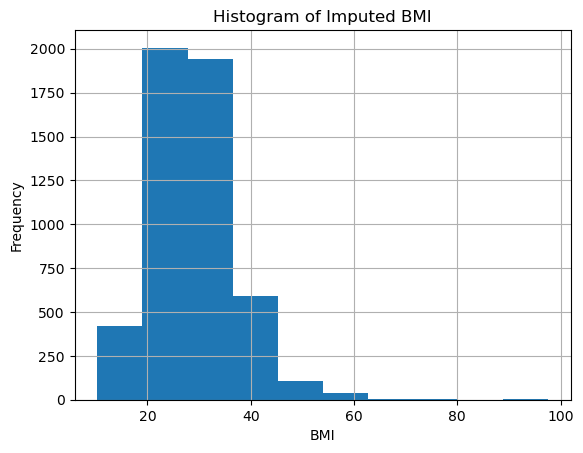

In [14]:
# Imputation Using KNN = 9

# Convert categorical column 'gender' to numeric values (Male=1, Female=0, Other=2)
stroke_copy_bmi['gender'] = stroke_copy_bmi['gender'].map({'Male':1, 'Female':0, 'Other':2})

# Select only numerical columns for KNN imputation
X = stroke_copy_bmi[['gender', 'age', 'hypertension', 'heart_disease', 
                     'avg_glucose_level', 'bmi', 'stroke']]

# Save mask of NaN positions in bmi (optional, useful for checking imputations later)
nan_mask = X['bmi'].isna()

# Apply KNN imputer with n_neighbors=9
imputer = KNNImputer(n_neighbors=9, weights="uniform")
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame with same columns and index
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Replace the original bmi column with the imputed one
stroke_copy_bmi['bmi'] = X_imputed_df['bmi']

# Check result
print(stroke_copy_bmi[['bmi']].head())

# Plot histogram of the imputed bmi column
stroke_copy_bmi['bmi'].hist()
plt.title("Histogram of Imputed BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()







### imputation with KNN
- To Use KNN we select only numerical columns, but gender is a categorical columns that is important and have impact in bmi, therefore we change it in a numerical column where: 'Male':1, 'Female':0, 'Other':2.
- Now our numerical columns to use in KNN imputation are:'gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'
- The categorical columns that we exclude for our imputation because it have low or non impact in bmi are: 'ever_married', 'work_type', 'residence_type', 'smoking_status'. - - - We select a NN = 9. 

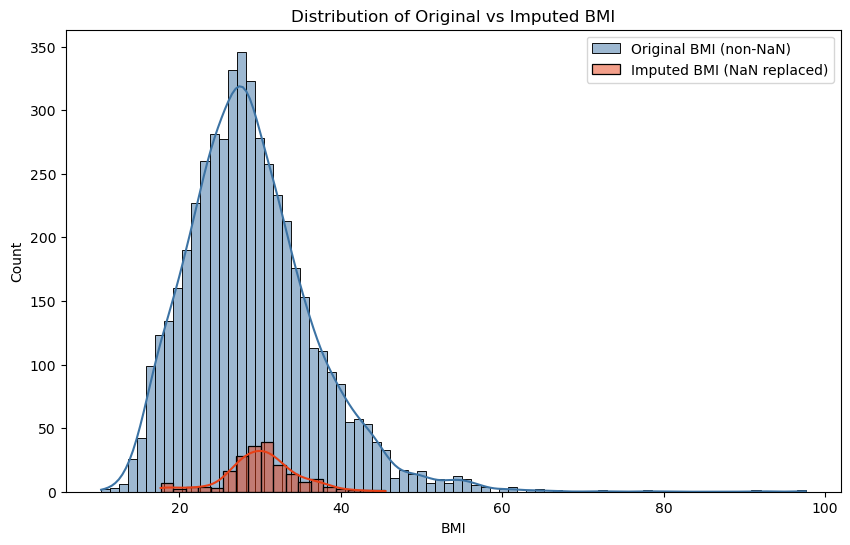

In [15]:
# Plot distributions
plt.figure(figsize=(10,6))

sns.histplot(stroke['bmi'].dropna(), color="#3c73a4", label="Original BMI (non-NaN)", kde=True)
sns.histplot(X_imputed_df.loc[nan_mask, 'bmi'], color="#e84016", label="Imputed BMI (NaN replaced)", kde=True)

plt.title("Distribution of Original vs Imputed BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend()
plt.show()


- In this histogram we can see in blue the original BMI values without NaN, and in red the imputed BMI values with NaN replaced by KNN imputation. 
- We see how the imputation was with a uniform distribution following the distribution of Original BMI valuos non-NaN

In [16]:
stroke_copy_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,34.388889,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,27.344444,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# since this point we will use the stroke_copy_processed df where we return the column gender from numerical to categorical. 


In [17]:
# since this point we will use the stroke_copy_processed where we return the column gender from numerical to categorical. 
# Create a copy of the DataFrame
stroke_copy_processed = stroke_copy_bmi.copy()

# Map numeric values back to categorical labels
stroke_copy_processed['gender'] = stroke_copy_processed['gender'].map({1:'Male', 0:'Female', 2:'Other'})

# Check the first few rows
print(stroke_copy_processed[['gender']].head())


   gender
0    Male
1  Female
2    Male
3  Female
4  Female


## Plots
- using stroke_copy_processed df we proced with the visual exploration of our dataset

## Number of Patients vs. Stroke Status

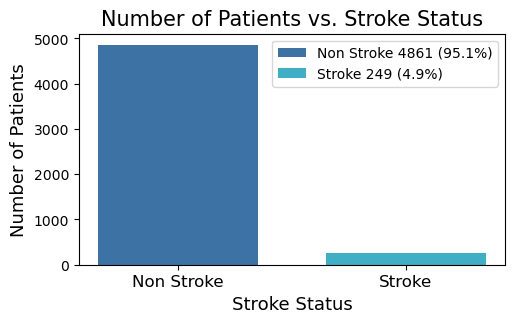

In [18]:
# Graphic 1: Number of Patients vs. Stroke Status
# Count patients in each stroke category (0 = No, 1 = Yes)
sum_stroke = stroke_copy_processed['stroke'].value_counts().sort_index()

# Calculate percentages
total = sum_stroke.sum()
percentages = (sum_stroke / total * 100).round(1)

# Create figure
fig, ax = plt.subplots(figsize=(5.5,3))

# Plot bars
bars = ax.bar(sum_stroke.index, sum_stroke.values,
              color=['#3c73a4', '#40aec4'],
              width=0.7)

# Build legend labels with counts + percentages
legend_labels = [
    f'Non Stroke {sum_stroke[0]} ({percentages[0]}%)',
    f'Stroke {sum_stroke[1]} ({percentages[1]}%)'
]

# Attach labels to each bar
for bar, label in zip(bars, legend_labels):
    bar.set_label(label)

# Add legend
ax.legend(loc='upper right')

# Titles and labels
ax.set_title('Number of Patients vs. Stroke Status', fontsize=15)
ax.set_xlabel('Stroke Status', fontsize=13)
ax.set_ylabel('Number of Patients', fontsize=13)
ax.set_xticks([0,1])
ax.set_xticklabels(['Non Stroke','Stroke'], fontsize=12)

plt.show()


# Tornado chart with matplotlib Stroke vs. Comorbidities: Hypertension and Heard Disease

In [19]:

# df copy to graph comorbilities in patients with and without stroke: HTA and HD
comorb_df = stroke_copy_processed[['hypertension','heart_disease','stroke']].copy()
comorb_df.head()

## Means HTA and HD

# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()


# Calculate the mean: 
# Within stroke=1
hta_stroke_mean = (hta_stroke / stroke_yes_total)*100
hd_stroke_mean  = (hd_stroke / stroke_yes_total)*100

# Within stroke=0
hta_no_stroke_mean = (hta_no_stroke / stroke_no_total)*100
hd_no_stroke_mean  = (hd_no_stroke / stroke_no_total)*100


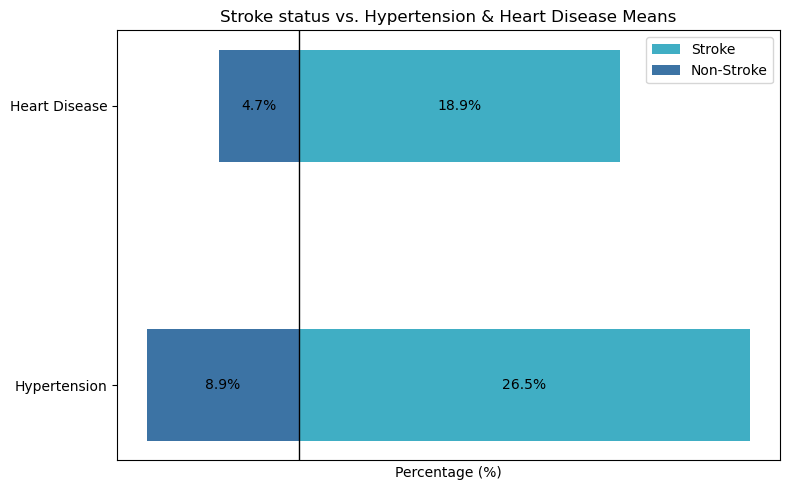

In [20]:
# Labels
labels = ["Hypertension", "Heart Disease"]

# Values (percentages)
stroke_means = np.array([hta_stroke_mean, hd_stroke_mean])           # Stroke group
non_stroke_means = np.array([hta_no_stroke_mean, hd_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, but values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Hypertension & Heart Disease Means")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Tornado chart with matplotlib Stroke vs. Risk Factors:  BMI and Smoke Status and Glucosa Category

In [21]:
# df copy to graph risk factors processed in patients with and without stroke: smoke, BMI and Glucose

risk_f_df = stroke_copy_processed[['avg_glucose_level'	, 'bmi', 'smoking_status', 'stroke']].copy()
risk_f_df.head()

,avg_glucose_level,bmi,smoking_status,stroke
0,228.69,36.600000,formerly smoked,1
1,202.21,34.388889,never smoked,1
2,105.92,32.500000,never smoked,1
3,171.23,34.400000,smokes,1
4,174.12,24.000000,never smoked,1


### BMI Categories

In [22]:

# Define the bins (boundaries) of x-axis categories
bins = [ 0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels = [ 'Underweight','Healthy Weight', 'Overweight', 'Obesity']

# Create a new column for BMI category type
risk_f_df['bmi_category'] = pd.cut(
    risk_f_df['bmi'],
      bins=bins, 
      labels=labels, 
      right=False)

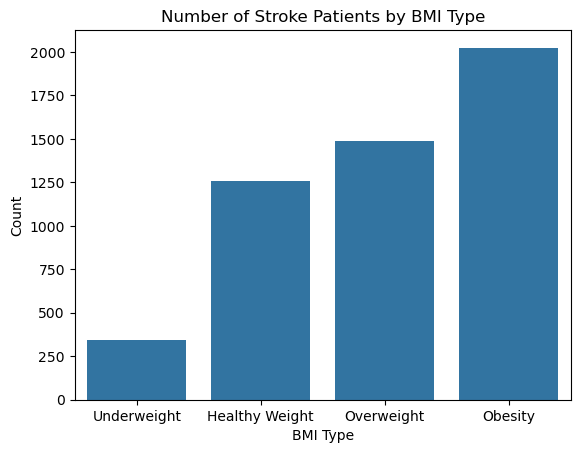

In [23]:
# Bar Plot for Count of patients by BMI (categories)
sns.countplot(data=risk_f_df, x='bmi_category', order=labels)
plt.title('Number of Stroke Patients by BMI Type')
plt.xlabel('BMI Type')
plt.ylabel('Count')
plt.show()

In [24]:
## Means Overweight and Obesity vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
ow_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Within stroke=0
ow_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Underweight')).sum()


# Calculate the mean: 
# Within stroke=1
ow_stroke_mean = (ow_stroke / stroke_yes_total)*100
ob_stroke_mean  = (ob_stroke / stroke_yes_total)*100
hw_stroke_mean  = (hw_stroke / stroke_yes_total)*100
uw_stroke_mean  = (uw_stroke / stroke_yes_total)*100

# Within stroke=0
ow_no_stroke_mean = (ow_no_stroke / stroke_no_total)*100
ob_no_stroke_mean  = (ob_no_stroke / stroke_no_total)*100
hw_no_stroke_mean  = (hw_no_stroke / stroke_no_total)*100
uw_no_stroke_mean  = (uw_no_stroke / stroke_no_total)*100

In [25]:
print("ow_no_stroke_mean:", ow_no_stroke_mean) # % patients with overweight and non stroke
print("ob_no_stroke_mean:", ob_no_stroke_mean) # % patients with Obesity and non stroke
print("hw_no_stroke_mean:", hw_no_stroke_mean) # % patients with healthy weight and non stroke
print("uw_no_stroke_mean:", uw_no_stroke_mean) # % patients with underweight and non stroke


print("ow_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("ob_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("hw_stroke_mean:", hw_stroke_mean) ## % patients with healthy weight and  stroke
print("uw_stroke_mean:", uw_stroke_mean) # % patients with underweight  and  stroke

ow_no_stroke_mean: 28.533223616539804
ob_no_stroke_mean: 39.33347047932524
hw_no_stroke_mean: 25.118288418020985
uw_no_stroke_mean: 7.015017486113968
ow_stroke_mean: 44.97991967871486
ob_stroke_mean: 44.97991967871486
hw_stroke_mean: 14.056224899598394
uw_stroke_mean: 0.8032128514056224


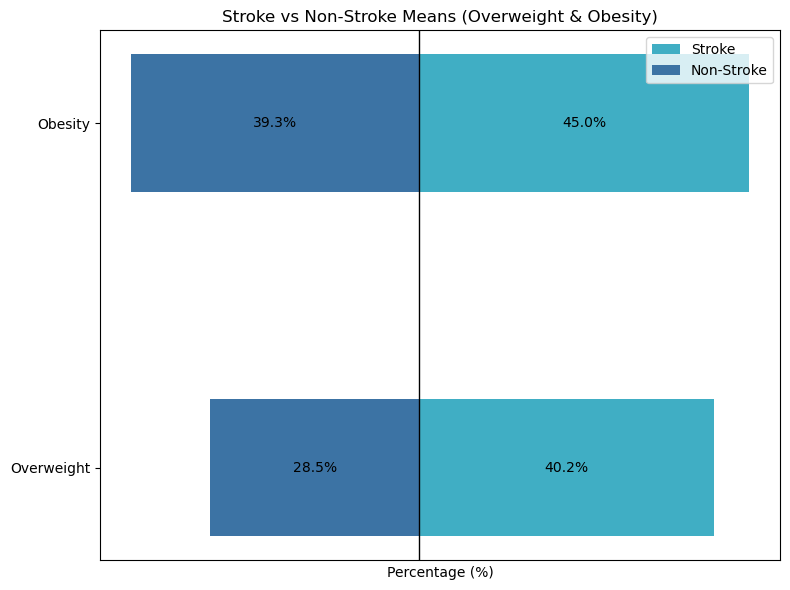

In [26]:
# Labels
labels = ["Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Overweight & Obesity)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

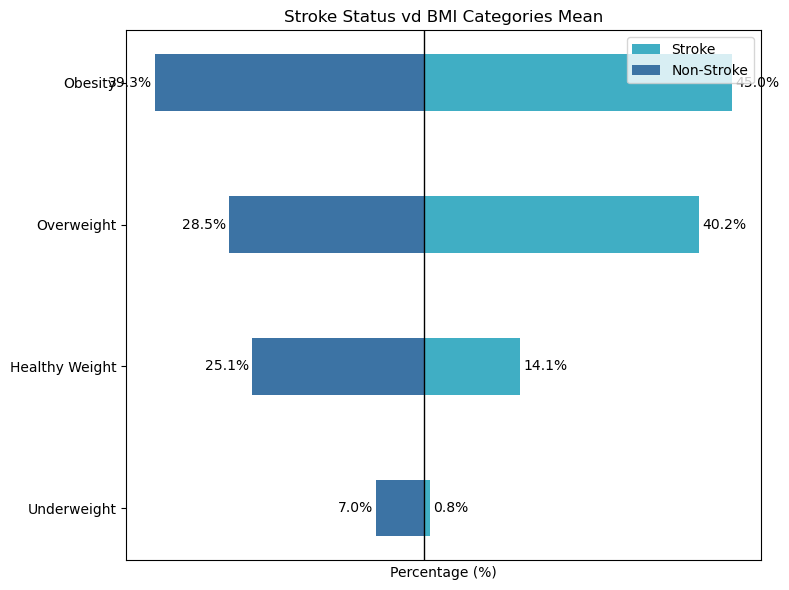

In [27]:
# Labels
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([uw_stroke_mean, hw_stroke_mean, ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([uw_no_stroke_mean, hw_no_stroke_mean, ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels OUTSIDE bars (to the front)
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(width + 0.5,                      # place label slightly to the right of the bar
            bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="left", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(width - 0.5,                      # place label slightly to the left of the bar
            bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="right", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke Status vd BMI Categories Mean")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Smoke Categories

In [28]:
## Means smoking status vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
f_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'smokes')).sum()
n_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Within stroke=0
f_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_no_stroke   = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'smokes')).sum()  
n_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Calculate the mean: 
# Within stroke=1
f_smk_stroke_mean = (f_smk_stroke / stroke_yes_total)*100
smk_stroke_mean  = (smk_stroke / stroke_yes_total)*100
n_smk_stroke_mean  = (n_smk_stroke / stroke_yes_total)*100
unk_smk_stroke_mean  = (unk_smk_stroke / stroke_yes_total)*100

# Within stroke=0
f_smk_no_stroke_mean = (f_smk_no_stroke / stroke_no_total)*100
smk_no_stroke_mean  = (smk_no_stroke / stroke_no_total)*100
n_smk_no_stroke_mean  = (n_smk_no_stroke / stroke_no_total)*100
unk_smk_no_stroke_mean  = (unk_smk_no_stroke / stroke_no_total)*100

In [29]:
print("f_smk_no_stroke_mean:", f_smk_no_stroke_mean) # % patients formerly smoked and non stroke
print("smk_no_stroke_mean:", smk_no_stroke_mean) # % patients smoker and non stroke
print("n_smk_no_stroke_mean:", n_smk_no_stroke_mean) # % patients never smoker and non stroke
print("unk_smk_no_stroke_mean:", unk_smk_no_stroke_mean) # % patients Unknown and non stroke


print("f_smk_stroke_mean:", f_smk_stroke_mean) # % patients formerly smoked  and  stroke
print("smk_stroke_mean:", smk_stroke_mean) # % patients smoker  and  stroke
print("n_smk_stroke_mean:", n_smk_stroke_mean) ## % patients never smoker and  stroke
print("unk_smk_stroke_mean:", unk_smk_stroke_mean) # % patients Unknown  and  stroke

f_smk_no_stroke_mean: 16.766097510800247
smk_no_stroke_mean: 15.367208393334705
n_smk_no_stroke_mean: 37.07056161283687
unk_smk_no_stroke_mean: 30.79613248302818
f_smk_stroke_mean: 28.11244979919679
smk_stroke_mean: 16.867469879518072
n_smk_stroke_mean: 36.144578313253014
unk_smk_stroke_mean: 18.87550200803213


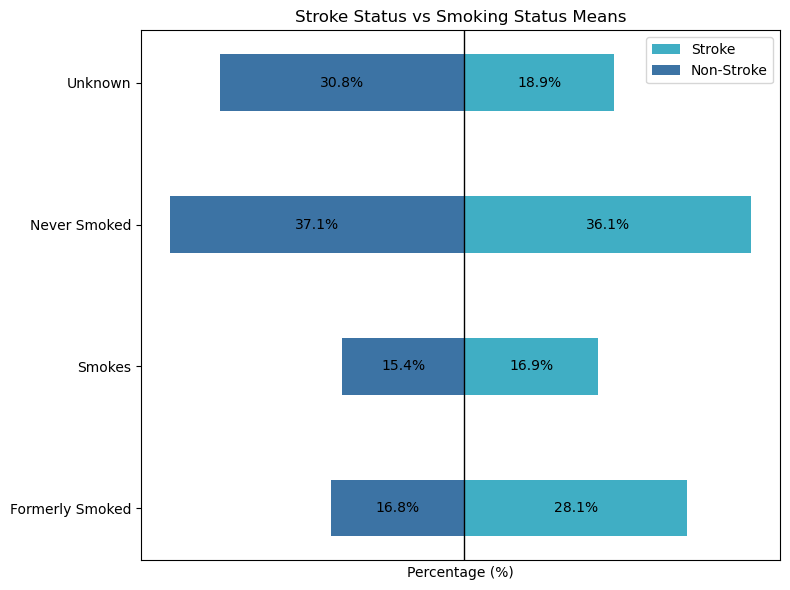

In [30]:
# Labels
labels = ["Formerly Smoked", "Smokes", "Never Smoked", "Unknown"]

# Values (percentages)
stroke_means = np.array([
    f_smk_stroke_mean,
    smk_stroke_mean,
    n_smk_stroke_mean,
    unk_smk_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    f_smk_no_stroke_mean,
    smk_no_stroke_mean,
    n_smk_no_stroke_mean,
    unk_smk_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke Status vs Smoking Status Means")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

## GLucose Average Cathegory

DM: more than 200mg/dl
Pre Diabetic between 140 and 199 mg/dl
Healthy Glucosa Average: 70 to 139mg/dl
Low: less tan 70

In [31]:
# Define the bins (boundaries) of x-axis categories
bins = [0, 70, 140, 200, float('inf')]

# Define the labels for each bin
labels = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create a new column for glucose categories
risk_f_df['glucose_category'] = pd.cut(
    risk_f_df['avg_glucose_level'],
    bins=bins,
    labels=labels,
    right=False
)

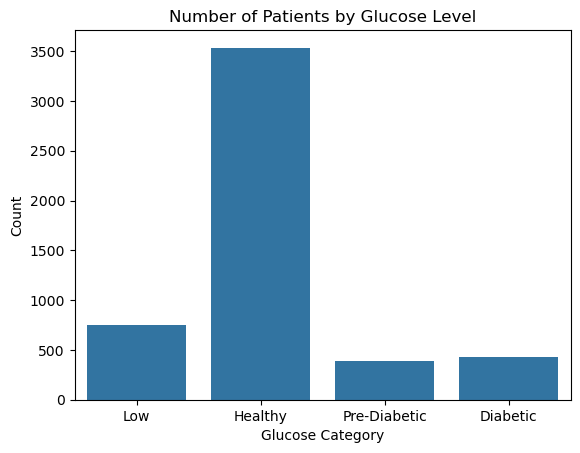

In [32]:
# Bar Plot for Count of patients by Glucose Level (categories)

sns.countplot(data=risk_f_df, x='glucose_category', order=labels)
plt.title('Number of Patients by Glucose Level')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.show()

In [33]:
## Means Overweight and glucosa average per category vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
dm_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Within stroke=0
dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Low')).sum()


# Calculate the mean: 
# Within stroke=1
dm_stroke_mean = (dm_stroke / stroke_yes_total)*100
p_dm_stroke_mean  = (p_dm_stroke / stroke_yes_total)*100
h_gav_stroke_mean  = (h_gav_stroke / stroke_yes_total)*100
l_gav_stroke_mean  = (l_gav_stroke / stroke_yes_total)*100

# Within stroke=0
dm_no_stroke_mean = (dm_no_stroke / stroke_no_total)*100
p_dm_no_stroke_mean  = (p_dm_no_stroke / stroke_no_total)*100
h_gav_no_stroke_mean  = (h_gav_no_stroke / stroke_no_total)*100
l_gav_no_stroke_mean  = (l_gav_no_stroke / stroke_no_total)*100

In [34]:
print("dm_no_stroke_mean:", dm_no_stroke_mean) # % patients with overweight and non stroke
print("p_dm_no_stroke_mean:", p_dm_no_stroke_mean) # % patients with Obesity and non stroke
print("h_gav_no_stroke_mean:", h_gav_no_stroke_mean) # % patients with healthy weight and non stroke
print("l_gav_no_stroke_mean:", l_gav_no_stroke_mean) # % patients with underweight and non stroke


print("dm_stroke_mean:", dm_stroke_mean) # % patients with Obesity  and  stroke
print("p_dm_stroke_mean:", p_dm_stroke_mean) # % patients with Obesity  and  stroke
print("h_gav_stroke_mean:", h_gav_stroke_mean) ## % patients with healthy weight and  stroke
print("l_gav_stroke_mean:", l_gav_stroke_mean) # % patients with underweight  and  stroke

dm_no_stroke_mean: 7.776177741205513
p_dm_no_stroke_mean: 7.20016457519029
h_gav_no_stroke_mean: 70.06788726599466
l_gav_no_stroke_mean: 14.955770417609546
dm_stroke_mean: 22.48995983935743
p_dm_stroke_mean: 14.859437751004014
h_gav_stroke_mean: 51.80722891566265
l_gav_stroke_mean: 10.843373493975903


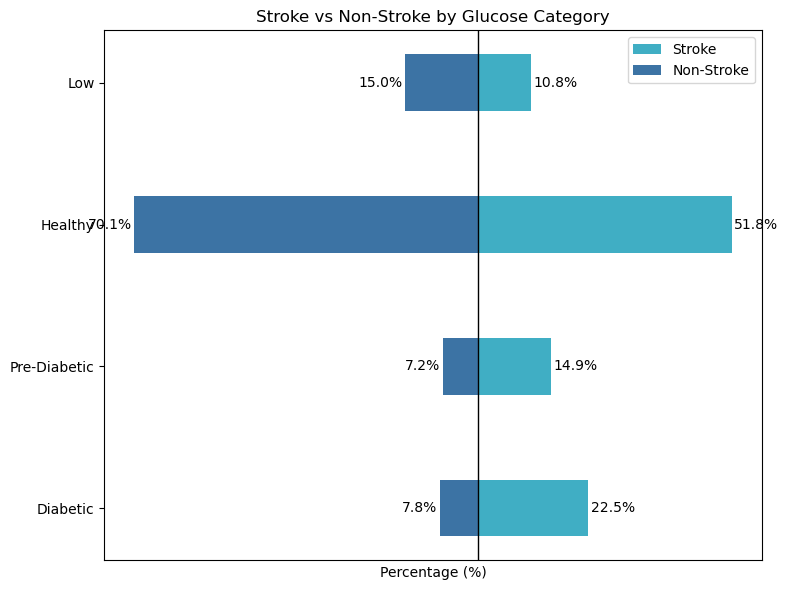

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Counts Stroke and Non-Stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total  = (risk_f_df['stroke'] == 0).sum()

# Step 2: Counts by glucose_category within stroke=1
dm_stroke   = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Step 3: Counts by glucose_category within stroke=0
dm_no_stroke   = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Step 4: Calculate percentages
# Stroke group
dm_stroke_mean   = (dm_stroke / stroke_yes_total) * 100
p_dm_stroke_mean = (p_dm_stroke / stroke_yes_total) * 100
h_gav_stroke_mean = (h_gav_stroke / stroke_yes_total) * 100
l_gav_stroke_mean = (l_gav_stroke / stroke_yes_total) * 100

# Non-Stroke group
dm_no_stroke_mean   = (dm_no_stroke / stroke_no_total) * 100
p_dm_no_stroke_mean = (p_dm_no_stroke / stroke_no_total) * 100
h_gav_no_stroke_mean = (h_gav_no_stroke / stroke_no_total) * 100
l_gav_no_stroke_mean = (l_gav_no_stroke / stroke_no_total) * 100

# Step 5: Labels and values
labels = ["Diabetic", "Pre-Diabetic", "Healthy", "Low"]

stroke_means     = np.array([dm_stroke_mean, p_dm_stroke_mean, h_gav_stroke_mean, l_gav_stroke_mean])
non_stroke_means = np.array([dm_no_stroke_mean, p_dm_no_stroke_mean, h_gav_no_stroke_mean, l_gav_no_stroke_mean])

y_pos = np.arange(len(labels))
bar_height = 0.4

# Step 6: Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Stroke bars (positive side)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Non-Stroke bars (negative side)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Step 7: Add labels outside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="left", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(width - 0.5, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="right", va="center", color="black", fontsize=10)

# Step 8: Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke by Glucose Category")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Data exploration with_stroke only

In [36]:
with_stroke = stroke_copy_processed.copy() # Dataset copy of observations with stroke to be used for data correlation. 
with_stroke.drop(['id'], axis=1, inplace=True)
with_stroke=  with_stroke[with_stroke['stroke']==1]
with_stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.388889,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,29.033333,Unknown,1


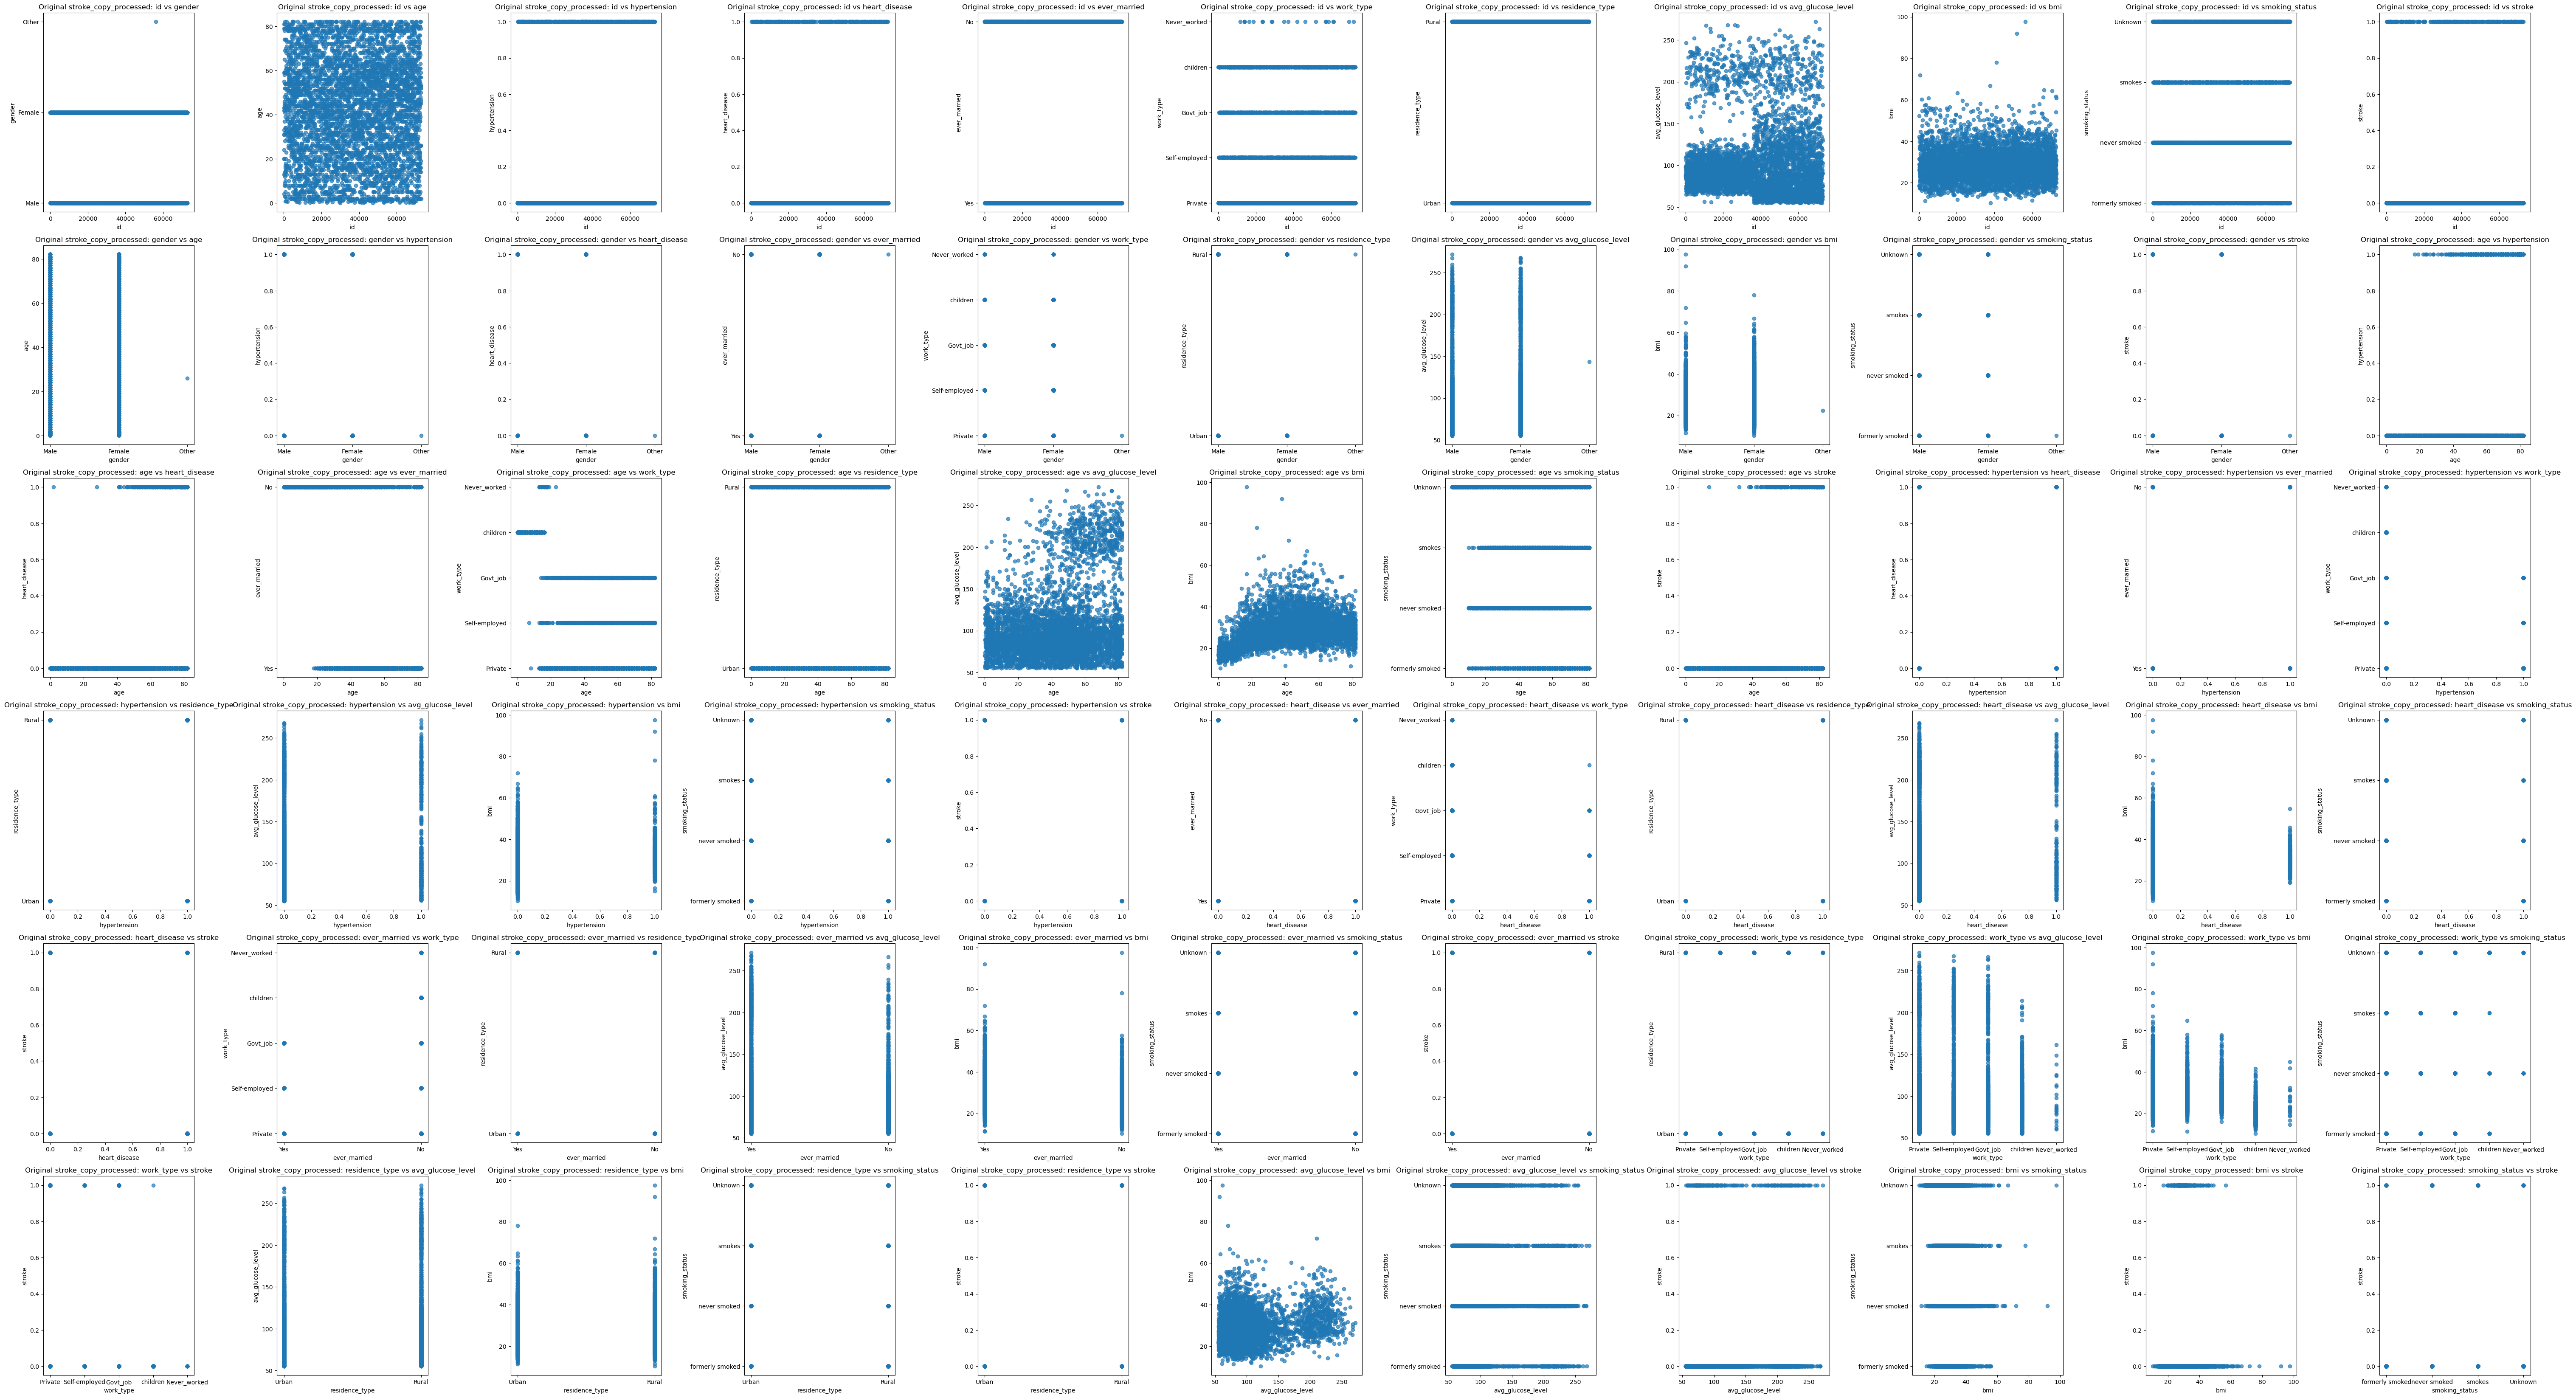

In [37]:
import matplotlib.pyplot as plt

def plot_feature_pairs(stroke_copy_processed, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - stroke_copy_processed: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(stroke_copy_processed[feature_names[i]], stroke_copy_processed[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(stroke_copy_processed[feature_names[i]], stroke_copy_processed[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = stroke_dropna.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(stroke_dropna, feature_names, title_prefix='Original stroke_copy_processed: ')

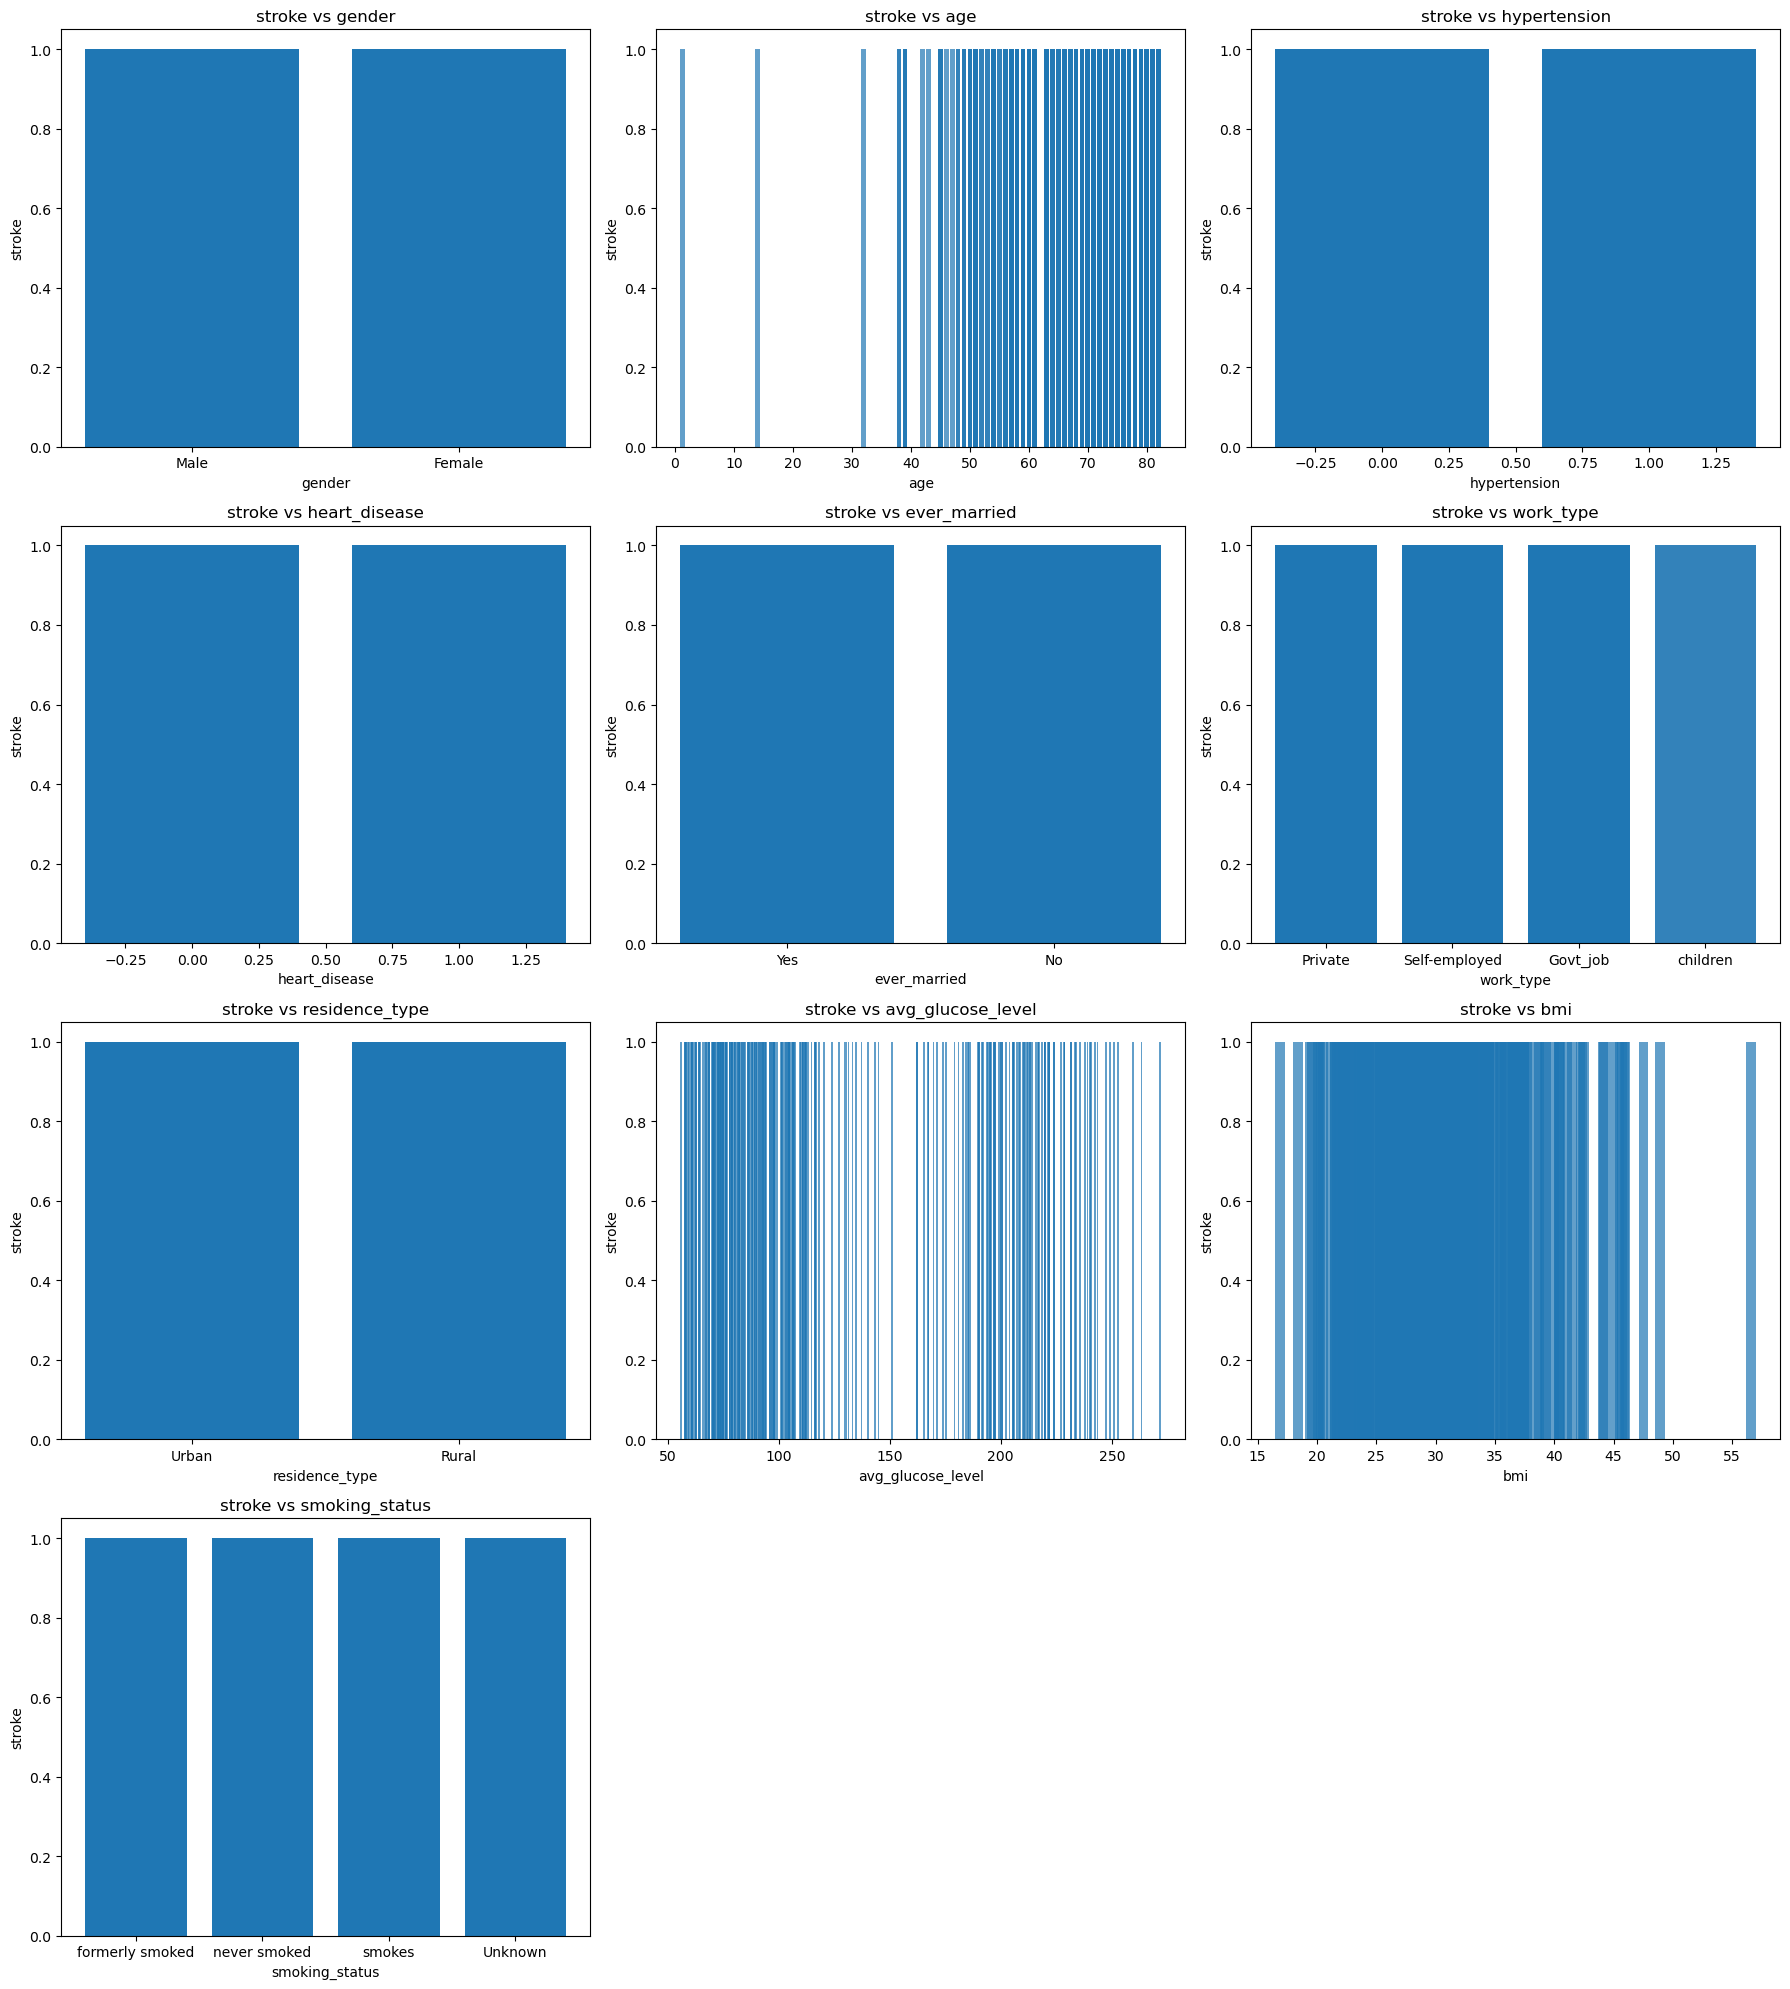

In [38]:
def plot_target_vs_features(stroke_copy_processed, feature_names, target_variable='stroke'):
    """
    Simple function to create plots of target variable (stroke) against other features.
    """
    features_to_plot = [f for f in feature_names if f != target_variable]
    
    n_features = len(features_to_plot)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    for i, feature in enumerate(features_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.bar(stroke_copy_processed[feature], stroke_copy_processed[target_variable], alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.title(f'{target_variable} vs {feature}')
    
    plt.tight_layout()
    plt.show()

# Get feature names and plot
feature_names = with_stroke.columns
plot_target_vs_features(with_stroke, feature_names, 'stroke')

In [39]:
with_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.388889,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,29.033333,Unknown,1


## Creation of with_stroke data set and export it for visualization

In [40]:
# Export the with_stroke dataset to a CSV file
# The file will be saved in the data directory
with_stroke.to_csv('./data/patients_with_stroke.csv', index=False)
print("Dataset successfully exported to './data/patients_with_stroke.csv'")

Dataset successfully exported to './data/patients_with_stroke.csv'


In [41]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Select features and target
# features = ['age', 'gender', 'hypertension', 'heart_disease', 'smoking_status']
# train_stroke = stroke[stroke['bmi'].notnull()]
# test_stroke = stroke[stroke['bmi'].isnull()]

# X_train = train_stroke[features]
# y_train = train_stroke['bmi']
# X_test = test_stroke[features]

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# predicted_bmi = model.predict(X_test)

# # Fill missing BMI
# stroke.loc[stroke['bmi'].isnull(), 'bmi'] = predicted_bmi